In [1]:
using Metalhead
using Metalhead: classify

┌ Info: Recompiling stale cache file /home/elbeltagy/.julia/compiled/v1.0/Metalhead/OYscp.ji for Metalhead [dbeba491-748d-5e0e-a39e-b530a07fa0cc]
└ @ Base loading.jl:1187


Getting an image of goose...we did that via a google image search

In [2]:
isfile("goose.jpg") || download("https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Domestic_Goose.jpg/220px-Domestic_Goose.jpg","goose.jpg")

true

In [3]:
using Images

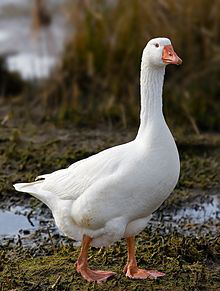

In [4]:
goose=load("goose.jpg")

In [5]:
vgg=VGG19()

VGG19()

In [6]:
classify(vgg,goose)

┌ Warning: `argmax(...) is deprecated, use `onecold(...)` instead.
│   caller = classify(::VGG19, ::Array{RGB{Normed{UInt8,8}},2}) at utils.jl:98
└ @ Metalhead /home/elbeltagy/.julia/packages/Metalhead/fYeSU/src/utils.jl:98


"goose"

In [7]:
goose |> size

(291, 220)

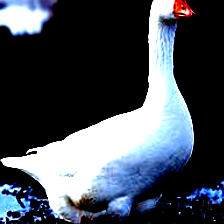

In [8]:
img_nn=Metalhead.preprocess(goose)
img=colorview(RGB,PermutedDimsArray(img_nn[:,:,:,1],[3,2,1])./255)

This is how the network "sees" the image after preprocessing

In [9]:
img |> size

(224, 224)

Compare this size with the above size. Look at the Metalhead code and try to figure out what steps were taken. 

In [10]:
firstBlock=vgg.layers[1:3] 

Chain(Conv((3, 3), 3=>64, NNlib.relu), Conv((3, 3), 64=>64, NNlib.relu), getfield(Metalhead, Symbol("##42#48"))())

In the above we extracted the first Conv -> Conv-> maxpool block for the VGG19 net. This is more proper than in the "06_CNN_Lect.ipynb" notebook. 

We now take a peek at the first block feature maps 

In [11]:
firstBlockFMs=firstBlock(img_nn);
firstBlockFMs |> size

(112, 112, 64, 1)

In [12]:
fmax,fmin=maximum(firstBlockFMs), minimum(firstBlockFMs)

(11844.645f0, 0.0f0)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

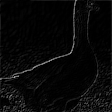
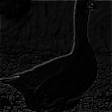
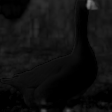
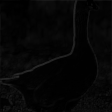
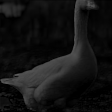
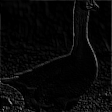
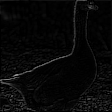
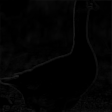
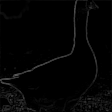
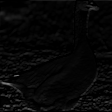
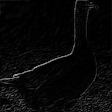
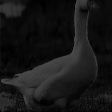
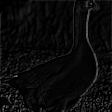
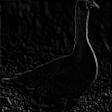
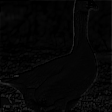
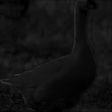
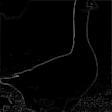
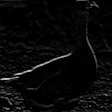
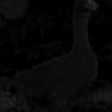
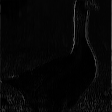
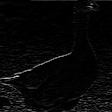
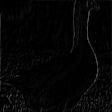
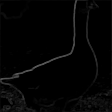
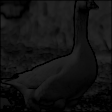
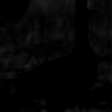
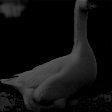
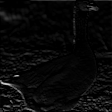
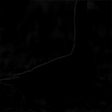
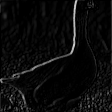
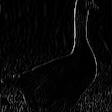
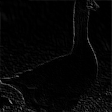
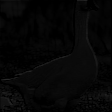
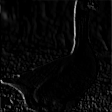
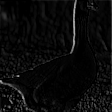
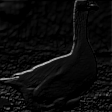
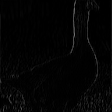
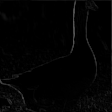
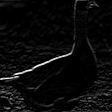
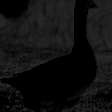
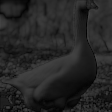
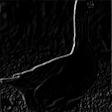
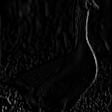
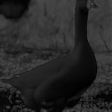
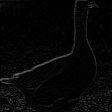
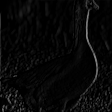
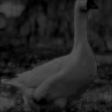
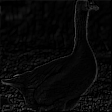
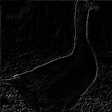
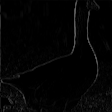
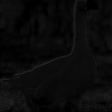
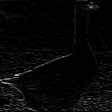
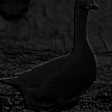
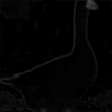
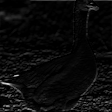
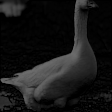
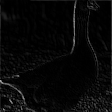
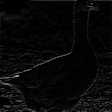
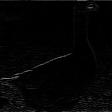
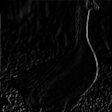
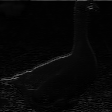
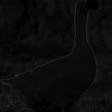
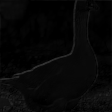
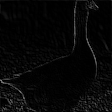
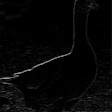

In [14]:
[colorview(Gray,PermutedDimsArray((firstBlockFMs[:,:,i,1].+fmin)./fmax ,[2,1]) ) for i=1:size(firstBlockFMs,3)]

We see see here that the first layer feature maps are mostly edge detectors. 

Important take home points
1. Metalhead can be used to obtain pretrained models.
2. Check the architecture described in the articles and in [code](https://github.com/FluxML/Metalhead.jl/blob/537c93daf6ed496082f75385da760c9f9c6fa0b5/src/vgg19.jl).. why was vgg.layers[1:3] correspond to the first conv->conv->pool block?  
3. What does the `getfield(Metalhead, Symbol("##42#48"))()` correspond to in the architecture? 
4. How can this be used to do transfer learning. 